In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install necessary libraries
!pip install tensorflow
!pip install keras
!pip install scikit-learn

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Define dataset paths
data_path = '/content/drive/MyDrive/Dataset/Alzheimers-ADNI'
train_path = os.path.join(data_path, 'train')
test_path = os.path.join(data_path, 'test')

In [ ]:
# Define image dimensions and batch size
img_size = (224, 224)
batch_size = 32

In [ ]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Validation set without data augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Load the training set
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the validation set
valid_generator = valid_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1101 images belonging to 5 classes.
Found 195 images belonging to 5 classes.


In [ ]:
# Define DenseNet121 with Transfer Learning
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(5, activation='softmax'))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# Train the model
epochs = 20
history = model.fit(train_generator, epochs=epochs, validation_data=valid_generator)

Epoch 1/20
35/35 [==============================] - 239s 7s/step - loss: 1.2141 - accuracy: 0.5223 - val_loss: 1.4856 - val_accuracy: 0.4513
Epoch 2/20
35/35 [==============================] - 229s 7s/step - loss: 1.2101 - accuracy: 0.5268 - val_loss: 1.4415 - val_accuracy: 0.4410
Epoch 3/20
35/35 [==============================] - 231s 7s/step - loss: 1.2137 - accuracy: 0.5195 - val_loss: 1.4289 - val_accuracy: 0.4410
Epoch 4/20
35/35 [==============================] - 238s 7s/step - loss: 1.1875 - accuracy: 0.5422 - val_loss: 1.4368 - val_accuracy: 0.4359
Epoch 5/20
35/35 [==============================] - 234s 7s/step - loss: 1.1990 - accuracy: 0.5359 - val_loss: 1.5307 - val_accuracy: 0.3282
Epoch 6/20
35/35 [==============================] - 255s 7s/step - loss: 1.1860 - accuracy: 0.5277 - val_loss: 1.4327 - val_accuracy: 0.4051
Epoch 7/20
35/35 [==============================] - 241s 7s/step - loss: 1.1778 - accuracy: 0.5341 - val_loss: 1.4206 - val_accuracy: 0.4308
Epoch 8/20
35

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/ADNI Project/densenet_transfer_learning.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the model on test set
test_generator = valid_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: set shuffle to False for correct evaluation
)

# Evaluate the model
eval_results = model.evaluate(test_generator)
print("Test Accuracy:", eval_results[1])

Found 195 images belonging to 5 classes.
7/7 [==============================] - 32s 5s/step - loss: 1.4448 - accuracy: 0.4256
Test Accuracy: 0.4256410300731659


In [ ]:
# Get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

7/7 [==============================] - 36s 5s/step


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.15      0.26        26
           1       0.49      0.70      0.58        87
           2       0.26      0.28      0.27        36
           3       0.00      0.00      0.00        11
           4       0.30      0.23      0.26        35

    accuracy                           0.43       195
   macro avg       0.37      0.27      0.27       195
weighted avg       0.43      0.43      0.39       195



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

Confusion Matrix:
[[ 4 10  7  0  5]
 [ 1 61 16  0  9]
 [ 0 23 10  0  3]
 [ 0  8  1  0  2]
 [ 0 22  5  0  8]]


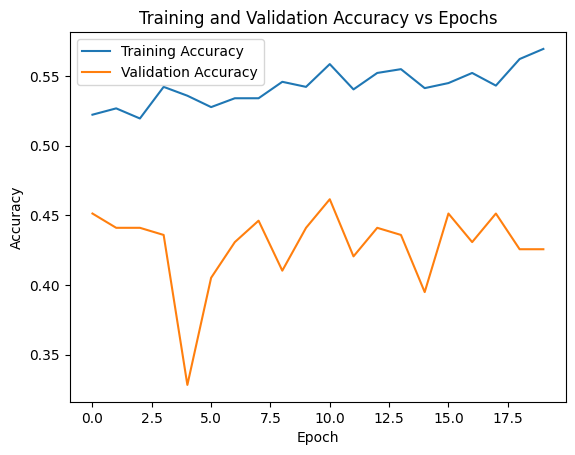

In [ ]:
# Plot training and validation accuracy vs epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy vs Epochs')
plt.show()

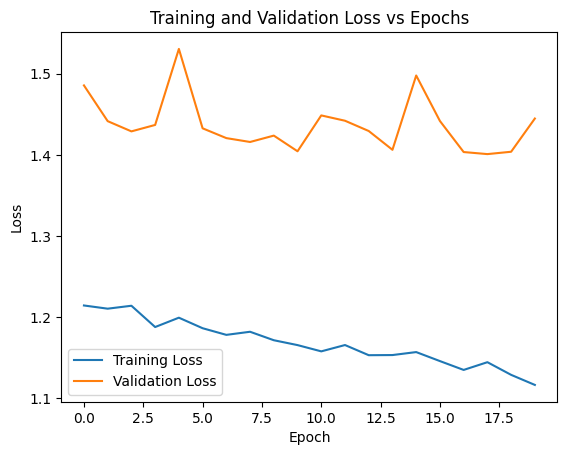

In [ ]:
# Plot training and validation loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs Epochs')
plt.show()